Importnig lips


In [22]:
import os
import sys
import torch
import importlib

current_dir = os.getcwd()
project_root = os.path.dirname(current_dir) 
sys.path.append(project_root)

# Import our custom modules
import src.utils as utils
import src.plots as plots
import src.flexible_nn as nn_flexible

from src.utils import load_transform_split_mnist, per_class_accuracy
from src.plots import plot_train_val_curves, plot_confusion_matrix, plot_per_class_acc
from src.flexible_nn import FlexibleNN

Load Data loaders

In [19]:
# Using the same utility from Part A, but loading all classes
train_loader, val_loader, test_loader, _, _, _, _, _, _ = load_transform_split_mnist(
    val_size=0.2, 
    classes=None, # None means all 10 classes
    batch_size=64
)

print("Data loaders created successfully.")

Data loaders created successfully.


Initialize and Train Model

In [ ]:
layer_sizes = [
    28 * 28,  # 784 Input
    128,      # Hidden 1
    64,       # Hidden 2
    10        # Output
]
LEARNING_RATE = 0.01
EPOCHS = 20  
N_RUNS = 5   

all_histories = []

print(f"Starting {N_RUNS} training runs (for error bars)...")
print("#" * 60)

for i in range(N_RUNS):
    print(f"\n--- Starting Run {i+1}/{N_RUNS} ---")
    
    # Set a different seed for each run for different weight initializations
    torch.manual_seed(i) 
    
    model = FlexibleNN(layer_sizes)
    
    # Note: fit method saves history internally.
    model.fit(train_loader, val_loader, epochs=EPOCHS, lr=LEARNING_RATE)
    
    # Save the history from this run
    all_histories.append(model.history)
    print(f"Run {i+1} complete.")

print("#" * 60)
print("All training runs complete!")

Starting 5 training runs (for error bars)...
############################################################

--- Starting Run 1/5 ---
Epoch  1/20 | Train Loss: 0.8404, Train Acc: 77.82% | Val Loss: 0.4265,   Val Acc: 88.51%
Epoch  2/20 | Train Loss: 0.3688, Train Acc: 89.72% | Val Loss: 0.3341,   Val Acc: 90.73%
Epoch  3/20 | Train Loss: 0.3042, Train Acc: 91.33% | Val Loss: 0.2909,   Val Acc: 91.68%
Epoch  4/20 | Train Loss: 0.2695, Train Acc: 92.26% | Val Loss: 0.2622,   Val Acc: 92.59%
Epoch  5/20 | Train Loss: 0.2453, Train Acc: 92.98% | Val Loss: 0.2444,   Val Acc: 93.14%
Epoch  6/20 | Train Loss: 0.2264, Train Acc: 93.55% | Val Loss: 0.2309,   Val Acc: 93.41%
Epoch  7/20 | Train Loss: 0.2102, Train Acc: 93.97% | Val Loss: 0.2177,   Val Acc: 93.75%
Epoch  8/20 | Train Loss: 0.1968, Train Acc: 94.44% | Val Loss: 0.2101,   Val Acc: 93.95%
Epoch  9/20 | Train Loss: 0.1850, Train Acc: 94.74% | Val Loss: 0.1991,   Val Acc: 94.37%
Epoch 10/20 | Train Loss: 0.1747, Train Acc: 95.05% | Val 

Performance Visualization

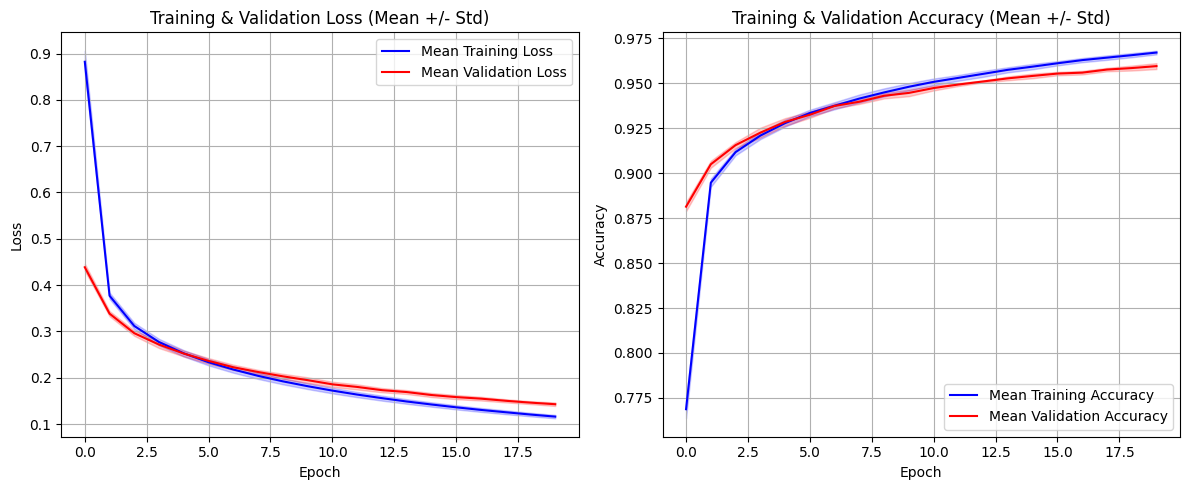

In [23]:
importlib.reload(plots)
from src.plots import plot_learning_curves_with_error_bars
plot_learning_curves_with_error_bars(all_histories)

Test Set Evaluation

Generating Confusion Matrix for Test Set (from last run)...


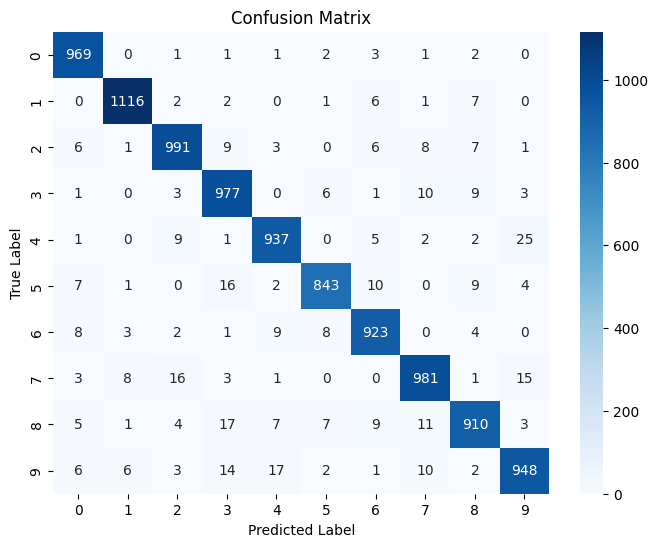


Generating Per-Class Accuracy for Test Set (from last run)...
   Class  Accuracy
0      0  0.988776
1      1  0.983260
2      2  0.960271
3      3  0.967327
4      4  0.954175
5      5  0.945067
6      6  0.963466
7      7  0.954280
8      8  0.934292
9      9  0.939544


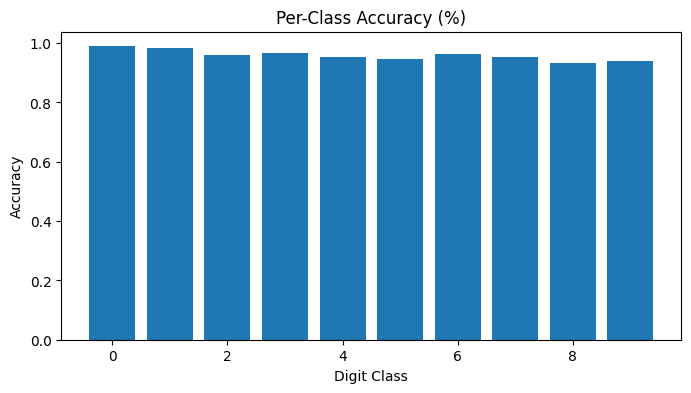

In [24]:
import numpy as np
# Get predictions for the entire test set
y_test = []
y_pred_test = []

model.eval() 
with torch.no_grad():
    for X, y in test_loader:
        preds = model.predict(X)
        y_test.extend(y.numpy())
        y_pred_test.extend(preds.numpy())

print("Generating Confusion Matrix for Test Set (from last run)...")
cm = plot_confusion_matrix(y_test, y_pred_test)

print("\nGenerating Per-Class Accuracy for Test Set (from last run)...")
df_acc = per_class_accuracy(cm)
plot_per_class_acc(df_acc)